#  CREDIT EDA CASE STUDY


### Business Case :

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers.

Use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.


## Understanding the Data :

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

* The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

* All other cases: All other cases when the payment is paid on time.

### Possible OutComes

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

1. Approved: The Company has approved loan Application

2. Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

3. Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

4. Unused offer:  Loan has been cancelled by the client but on different stages of the process.

Need to use EDA to understand how consumer attributes and loan attributes influence the tendency of default.


## Business Objective


This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

 


##  About the data


1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

 

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

 

3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.

###### Supressing warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

#### Importing Required Libraries :

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

#### Changing display formats

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
about = pd.read_csv('columns_description.csv',encoding='iso-8859-1')

`application_data.csv` contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.

In [5]:
data_application = pd.read_csv('application_data.csv')

In [6]:
data_application.shape

(307511, 122)

### CHECKING Info on the data loaded

In [7]:
data_application.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

# DATA UNDERSTANDING AND PREPARATION

#### Checking for percentage of null values 

This analysis will yeild information about the data in following ways :

* We'll use this to identify what kind of data is missing, and whether its valid or not.
0. Check the imbalance percentage of data.
1. Checking percentage of null value.
2. Dropping columns with null > 45%
3. Impute null values with null < 20%
4. Data with null between 20-45% we'll have find correlation to different column and impute if necessary and important for `TARGET` variable
5. Drop duplicates if present

After Check, we'll have subset as follwing :

`cols_to_drop` : These will be the columns we'll drop, based on the type of values they hold.

`cols_to_impute` : These will be the columns we'll need to impute the null values using central tendencies

`rows_dropped` : Total number of rows dropped from the main dataset

***Note*** : Idea behind creating list of different column categories is to have it handy to cross check whenever required.

In [8]:
cols_to_drop = []
cols_to_impute = []
rows_dropped = 0

**Checking imbalance of data**

In [9]:
data_application['TARGET'].value_counts(normalize=True)

0   0.92
1   0.08
Name: TARGET, dtype: float64

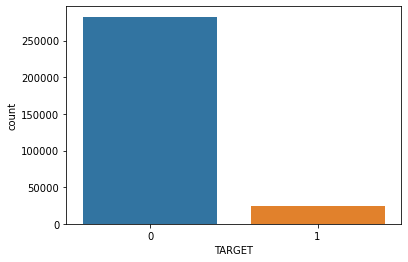

In [10]:
sns.countplot(data_application['TARGET'])
plt.show()

Note : The data is heavily imbalance towards `TARGET` = 0, until this imbalance is resolved we will refrain to check correlation of any attribute with `TARGET` variable as it will be heavily biased towards 0

#### Find Percentage null values

In [11]:
data_application.isnull().sum()*100/data_application.shape[0]

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OWN_CAR_AGE                    65.99
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
F

In [12]:
data_application['TARGET'].value_counts(normalize=True)

0   0.92
1   0.08
Name: TARGET, dtype: float64

There is a huge data imbalance, this has to be kept in mind while doing any analysis

**CHECKING for Duplicates :**

In [13]:
data_application[data_application.duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


*No Duplicates present in the data*

**HANDLING NULL for :** `AMT_ANNUITY`

In [14]:
data_application[data_application['AMT_ANNUITY'].isnull()].shape

(12, 122)

All `AMT_ANNUITY` is null only for Cash Loans, by definition cash loans are :

> *Instant cash loans are short-term loans that are processed quickly, usually within an hour, giving you access to funds instantly. Also known as cash advance loans and pay day loans, this type of loans is ideal for situations when you need funds immediately.*

Here are few observations from other attributes of `AMT_ANNUITY` as null :
1. All the rows with aforementioned columns as null have Target as 0 below is observation :
> As the `TARGET` with value 0 is around 91% removing 0.003% will not sway 
2. Other rows are randomly distributed with respect to the 12 columns, that also should not introduce bias

Has handling of null, we are removing the rows where `AMT_ANNUITY` is null using following code :-

In [15]:
rows_dropped = rows_dropped+data_application['AMT_ANNUITY'].isnull().sum()

In [16]:
data_application = data_application.loc[~data_application['AMT_ANNUITY'].isnull(),:]

**HANDLING NULL for** : `AMT_GOODS_PRICE`

Checking the correlation of `AMT_GOODS_PRICE`with `AMT_CREDIT`

In [17]:
data_application[['AMT_CREDIT','AMT_GOODS_PRICE']].corr()

,AMT_CREDIT,AMT_GOODS_PRICE
AMT_CREDIT,1.00,0.99
AMT_GOODS_PRICE,0.99,1.00


In [18]:
data_application[data_application['AMT_GOODS_PRICE'].isnull()].shape

(278, 122)

Most of the records are in 1:1 ratio for `AMT_GOODS_PRICE` : `AMT_CREDIT`

In [19]:
round((data_application['AMT_GOODS_PRICE']/data_application['AMT_CREDIT']),0).value_counts(normalize=True)

1.00   1.00
2.00   0.00
0.00   0.00
3.00   0.00
4.00   0.00
7.00   0.00
dtype: float64

In [20]:
data_application[(data_application['AMT_GOODS_PRICE']/data_application['AMT_CREDIT']) == 1]['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         79531
Revolving loans    28673
Name: NAME_CONTRACT_TYPE, dtype: int64

In [21]:
data_application.loc[data_application['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE'] = data_application.loc[data_application['AMT_GOODS_PRICE'].isnull(),'AMT_CREDIT']

In [22]:
data_application[(data_application['AMT_GOODS_PRICE']/data_application['AMT_CREDIT']) == 1]['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         79531
Revolving loans    28951
Name: NAME_CONTRACT_TYPE, dtype: int64

In [23]:
data_application['AMT_GOODS_PRICE'].isnull().sum()

0

All `AMT_GOODS_PRICE` is null only for Revolving Loans, by definition revolving loans are :

*A revolving loan facility is a form of credit issued by a financial institution that provides the borrower with the ability to draw down or withdraw, repay, and withdraw again. A revolving loan is considered a flexible financing tool due to its repayment and re-borrowing accommodations.*

We have seen that `AMT_GOODS_PRICE` and `AMT_CREDIT` are highly correlated, so much that in most of the cases `AMT_GOODS_PRICE` approximately equals to `AMT_CREDIT`

Hence imputing those values to `AMT_CREDIT`

In [24]:
cols_to_impute.append('AMT_GOODS_PRICE')

**HANDLING FOR FIELD :** `NAME_TYPE_SUITE`

In [25]:
data_application['NAME_TYPE_SUITE'].isnull().sum()*100/data_application.shape[0]

0.4201639680129041

In [26]:
data_application['NAME_TYPE_SUITE'].value_counts(normalize=True)

Unaccompanied     0.81
Family            0.13
Spouse, partner   0.04
Children          0.01
Other_B           0.01
Other_A           0.00
Group of people   0.00
Name: NAME_TYPE_SUITE, dtype: float64

The Column `NAME_TYPE_SUITE` and only *0.4%* of rows are null we'll impute these with value `Unaccompanied` as its for *81%* of the clients, following is the code for the same :-

In [27]:
most_frequent = data_application['NAME_TYPE_SUITE'].value_counts(normalize=True).index[0]
data_application['NAME_TYPE_SUITE'].fillna(most_frequent,inplace=True)
print(f"All null removed for NAME_TYPE_SUITE = {data_application['NAME_TYPE_SUITE'].isnull().sum() == 0}")

All null removed for NAME_TYPE_SUITE = True


**HANDLING FOR FIELD :** `OWN_CAR_AGE`

In [28]:
data_application['OWN_CAR_AGE'].isnull().sum()*100/len(data_application)

65.99045850555612

In [29]:
data_application.loc[data_application['FLAG_OWN_CAR']=='N','OWN_CAR_AGE'].isnull().sum()*100/len(data_application)

65.98883248400807

In [30]:
data_application.loc[(data_application['OWN_CAR_AGE'].isnull()) & (data_application['FLAG_OWN_CAR']=='Y'),'OWN_CAR_AGE'].isnull().sum()

5

Based on above observation, following rules used to impute values : 
1. If client doesnt own a car the OWN_CAR_AGE should be 0
2. If client owns a car, then value should be imputed using Median

In [31]:
data_application.loc[(data_application['OWN_CAR_AGE'].isnull()) & ((data_application['FLAG_OWN_CAR']=='Y')), 'OWN_CAR_AGE' ] = data_application['OWN_CAR_AGE'].describe()['50%']

In [32]:
data_application['OWN_CAR_AGE'].fillna(0,inplace=True)

In [33]:
data_application['OWN_CAR_AGE'].isnull().sum()

0

In [34]:
cols_to_impute.append('OWN_CAR_AGE')

**HANDLING FOR FIELD :** `OCCUPATION_TYPE`

In [35]:
data_application['OCCUPATION_TYPE'].value_counts(normalize=True)

Laborers                0.26
Sales staff             0.15
Core staff              0.13
Managers                0.10
Drivers                 0.09
High skill tech staff   0.05
Accountants             0.05
Medicine staff          0.04
Security staff          0.03
Cooking staff           0.03
Cleaning staff          0.02
Private service staff   0.01
Low-skill Laborers      0.01
Waiters/barmen staff    0.01
Secretaries             0.01
Realty agents           0.00
HR staff                0.00
IT staff                0.00
Name: OCCUPATION_TYPE, dtype: float64

Since the `OCCUPATION_TYPE` was a categorical value which was Missing at completely at random and we could not derive, we created another cateogry to handle these null

Following is the code :

In [36]:
data_application['OCCUPATION_TYPE'].fillna('Undefined',inplace=True)

**HANDLING for field :** `CNT_FAM_MEMBERS`

In [37]:
print(data_application['CNT_FAM_MEMBERS'].describe())
print(f"mode : {data_application['CNT_FAM_MEMBERS'].mode()}")

count   307497.00
mean         2.15
std          0.91
min          1.00
25%          2.00
50%          2.00
75%          3.00
max         20.00
Name: CNT_FAM_MEMBERS, dtype: float64
mode : 0   2.00
dtype: float64


Since the mean/median/mode are all around 2 we will impute null as 2, following is the code

In [38]:
data_application['CNT_FAM_MEMBERS'].isnull().sum()

2

In [39]:
data_application['CNT_FAM_MEMBERS'].fillna(2,inplace=True)

In [40]:
data_application['CNT_FAM_MEMBERS'].isnull().sum()

0

**HANDLING FOR :** All Normalized fields _AVG/_MEDI/_MODE 

In [41]:
print(data_application['REGION_RATING_CLIENT'].value_counts(normalize=True))
print(data_application['REGION_RATING_CLIENT_W_CITY'].value_counts(normalize=True))

2   0.74
3   0.16
1   0.10
Name: REGION_RATING_CLIENT, dtype: float64
2   0.75
3   0.14
1   0.11
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


**HANDLING NULL FOR :** Normalized features about where client lives

We will utlize already available information of `REGION_RATING_CLIENT` and `REGION_RATING_CLIENT_W_CITY`
And try to map (1,2,3) to (Low, Medium, High)

Currenlty we are not aware which of (1 or 3) is a  (High or Low)

Once that is done it'll eliminate the need of Normalized information about where client lives

Reason for this approach : Since these normalized columns have more than `50%` of columns as null, its best if we could find a feature in the data that could safely represent what this normalized data is trying to represent.

For this we'll perform multivariate analysis on these columns which seem to be related to the region/area where the client lives and try to find how these attributes are related

In [42]:
#Starting with finding correlation of all these columns with the Target variable
client_living_condition_col =['REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','TARGET', 'APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']
s = data_application.loc[:,client_living_condition_col].corr()['TARGET']*100

s[(s < -3) | (s > 4)]

REGION_RATING_CLIENT_W_CITY     6.09
REGION_RATING_CLIENT            5.89
TARGET                        100.00
ELEVATORS_AVG                  -3.42
FLOORSMAX_AVG                  -4.40
FLOORSMIN_AVG                  -3.36
LIVINGAREA_AVG                 -3.30
ELEVATORS_MODE                 -3.21
FLOORSMAX_MODE                 -4.32
FLOORSMIN_MODE                 -3.27
LIVINGAREA_MODE                -3.07
ELEVATORS_MEDI                 -3.39
FLOORSMAX_MEDI                 -4.38
FLOORSMIN_MEDI                 -3.34
LIVINGAREA_MEDI                -3.27
TOTALAREA_MODE                 -3.26
Name: TARGET, dtype: float64

From above we see that the values are very slightly correlated to the target column, max value -4, 
Lets see if theres anything can these values correlate to and we can use to draw inference
We start by picking the attributes that have abs highest correlation with target field

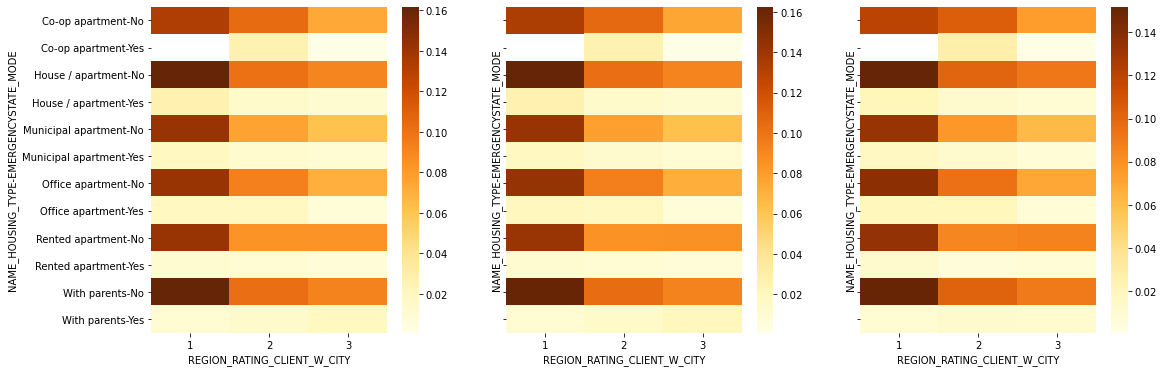

In [43]:
subset = data_application[['REGION_RATING_CLIENT_W_CITY','NAME_HOUSING_TYPE','HOUSETYPE_MODE','EMERGENCYSTATE_MODE','LIVINGAREA_AVG','LIVINGAREA_MEDI','LIVINGAREA_MODE']]
fig,ax = plt.subplots(ncols=3,sharey=True)
fig.set_size_inches(18, 6, forward=True)
sns.heatmap(subset.pivot_table(index=['NAME_HOUSING_TYPE','EMERGENCYSTATE_MODE'],columns=['REGION_RATING_CLIENT_W_CITY'],aggfunc='mean')['LIVINGAREA_AVG'],annot=False,ax=ax[0],cmap='YlOrBr',fmt='')
sns.heatmap(subset.pivot_table(index=['NAME_HOUSING_TYPE','EMERGENCYSTATE_MODE'],columns=['REGION_RATING_CLIENT_W_CITY'],aggfunc='mean')['LIVINGAREA_MEDI'],annot=False,ax=ax[1],cmap='YlOrBr',fmt='')
sns.heatmap(subset.pivot_table(index=['NAME_HOUSING_TYPE','EMERGENCYSTATE_MODE'],columns=['REGION_RATING_CLIENT_W_CITY'],aggfunc='mean')['LIVINGAREA_MODE'],annot=False,ax=ax[2],cmap='YlOrBr',fmt='')

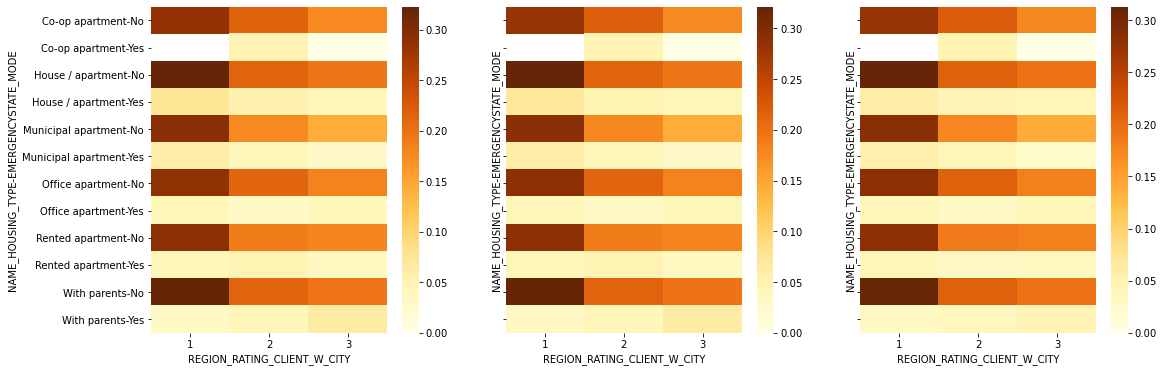

In [44]:
subset = pd.merge(data_application.loc[:,data_application.filter(like='FLOORSMAX_').columns],data_application[['REGION_RATING_CLIENT_W_CITY','NAME_HOUSING_TYPE','EMERGENCYSTATE_MODE']],left_index=True,right_index=True)
fig,ax = plt.subplots(ncols=3,sharey=True)
fig.set_size_inches(18, 6, forward=True)
sns.heatmap(subset.pivot_table(index=['NAME_HOUSING_TYPE','EMERGENCYSTATE_MODE'],columns=['REGION_RATING_CLIENT_W_CITY'],aggfunc='mean')['FLOORSMAX_AVG'],annot=False,ax=ax[0],cmap='YlOrBr',fmt='')
sns.heatmap(subset.pivot_table(index=['NAME_HOUSING_TYPE','EMERGENCYSTATE_MODE'],columns=['REGION_RATING_CLIENT_W_CITY'],aggfunc='mean')['FLOORSMAX_MEDI'],annot=False,ax=ax[1],cmap='YlOrBr',fmt='')
sns.heatmap(subset.pivot_table(index=['NAME_HOUSING_TYPE','EMERGENCYSTATE_MODE'],columns=['REGION_RATING_CLIENT_W_CITY'],aggfunc='mean')['FLOORSMAX_MODE'],annot=False,ax=ax[2],cmap='YlOrBr',fmt='')

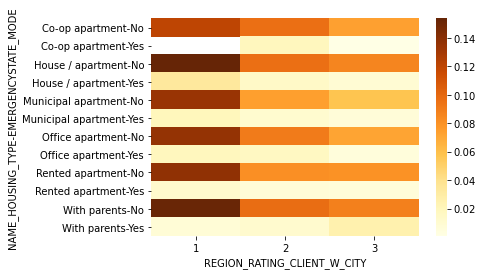

In [45]:
subset = data_application[['REGION_RATING_CLIENT_W_CITY','NAME_HOUSING_TYPE','HOUSETYPE_MODE','EMERGENCYSTATE_MODE','TOTALAREA_MODE']]
fig,ax = plt.subplots(ncols=1,sharey=True)
fig.set_size_inches(6, 4, forward=True)
sns.heatmap(subset.pivot_table(index=['NAME_HOUSING_TYPE','EMERGENCYSTATE_MODE'],columns=['REGION_RATING_CLIENT_W_CITY'],aggfunc='mean')['TOTALAREA_MODE'],annot=False,cmap='YlOrBr',fmt='')


From above observation its safe to assume that

For the fields : `REGION_RATING_CLIENT_W_CITY` and `REGION_RATING_CLIENT` the values
> 1 corresponds to High | 
2 corresponds to Medium | 
3 corresponds to Low

That is even fortified by the fact that the correlation is positive with target field, proving that with increase in value the `TARGET` is more likely to be 1

In [46]:
cols_to_drop.extend(data_application.filter(like='_AVG').columns)
cols_to_drop.extend(data_application.filter(like='_MEDI').columns)
cols_to_drop.extend(data_application.filter(like='_MODE').columns)

**HANDLING FIELDS FOR :** `FLAG_XX`

In [47]:
cols = [col for col in data_application.columns if "FLAG_DOCUMENT" in col]
cols.append('TARGET')
something = data_application.loc[:,cols]
something.corr()['TARGET']*100

FLAG_DOCUMENT_2      0.54
FLAG_DOCUMENT_3      4.43
FLAG_DOCUMENT_4     -0.27
FLAG_DOCUMENT_5     -0.03
FLAG_DOCUMENT_6     -2.86
FLAG_DOCUMENT_7     -0.15
FLAG_DOCUMENT_8     -0.80
FLAG_DOCUMENT_9     -0.44
FLAG_DOCUMENT_10    -0.14
FLAG_DOCUMENT_11    -0.42
FLAG_DOCUMENT_12    -0.08
FLAG_DOCUMENT_13    -1.16
FLAG_DOCUMENT_14    -0.95
FLAG_DOCUMENT_15    -0.65
FLAG_DOCUMENT_16    -1.16
FLAG_DOCUMENT_17    -0.34
FLAG_DOCUMENT_18    -0.80
FLAG_DOCUMENT_19    -0.14
FLAG_DOCUMENT_20     0.02
FLAG_DOCUMENT_21     0.37
TARGET             100.00
Name: TARGET, dtype: float64

In [48]:
tmp = []
for col in something.columns:
    tmp_series = something.loc[something['TARGET']==1,col].value_counts(normalize=True)
    tmp_series.name = col
    tmp.append(tmp_series)
df_value_counts_defautler = pd.concat(tmp, axis=1)
tmp = []
for col in something.columns:
    tmp_series = something.loc[something['TARGET']==0,col].value_counts(normalize=True)
    tmp_series.name = col
    tmp.append(tmp_series)
df_value_counts_non_defaulter = pd.concat(tmp, axis=1)

cols.remove('TARGET')

In [49]:
df_value_counts_defautler

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,1.00,0.22,1.00,0.99,0.94,1.00,0.93,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.99,1.00,0.99,1.00,1.00,1.00,nan
1,0.00,0.78,nan,0.01,0.06,0.00,0.07,0.00,nan,0.00,nan,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,1.00


In [50]:
df_value_counts_non_defaulter

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,1.00,0.30,1.00,0.98,0.91,1.00,0.92,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.99,1.00,0.99,1.00,1.00,1.00,1.00
1,0.00,0.70,0.00,0.02,0.09,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,nan


#### Observation about FLAG_DOCUMENT : 
**What is observed** : Above observation indicate that `FLAG_DOCUMENT_3` has is most submitted document, also have the highest correlation with `TARGET` all the other documents have a 5% submission ratio, and that remains same for both Defaulter and Non Defaulter.

**Descision** : Since this field shows little to no variation with respect to Target field and there are other fields which can have genuine impact we'll not focus on `FLAG_DOCUMENT_XX` Fields

In [51]:
cols_to_drop.extend(cols)
cols=[]

**HANDLING Null for** : OBS/DEF_XX_CNT_SOCIAL_CIRCLE

In [52]:
cols = ['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
data_application.loc[data_application['TARGET']==0,\
                     ['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',\
                      'DEF_60_CNT_SOCIAL_CIRCLE','TARGET']].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,TARGET
count,281689.00,281689.00,281689.00,281689.00,282674.00
mean,1.42,0.14,1.40,0.10,0.00
std,2.40,0.44,2.38,0.36,0.00
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00
75%,2.00,0.00,2.00,0.00,0.00
max,348.00,34.00,344.00,24.00,0.00


In [53]:
data_application.loc[data_application['TARGET']==1,\
                     ['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',\
                      'DEF_60_CNT_SOCIAL_CIRCLE','TARGET']].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,TARGET
count,24789.00,24789.00,24789.00,24789.00,24825.00
mean,1.50,0.19,1.48,0.14,1.00
std,2.38,0.52,2.36,0.43,0.00
min,0.00,0.00,0.00,0.00,1.00
25%,0.00,0.00,0.00,0.00,1.00
50%,0.00,0.00,0.00,0.00,1.00
75%,2.00,0.00,2.00,0.00,1.00
max,30.00,6.00,29.00,5.00,1.00


As can be seen from the above chart, most of the values are 0 (Median and Mode), hence we'll be imputing the null with 0

In [54]:
data_application['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0,inplace=True)
data_application['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0,inplace=True)
data_application['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0,inplace=True)
data_application['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0,inplace=True)

**HANDLING null values for :** DAYS_LAST_PHONE_CHANGE

In [55]:
data_application[data_application.DAYS_LAST_PHONE_CHANGE.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
15709,118330,0,Cash loans,M,Y,Y,0,126000.00,278613.00,25911.00,252000.00,Unaccompanied,Working,Incomplete higher,Married,House / apartment,0.01,-8574,-293,-4790.00,-1075,21.00,0,1,0,1,0,0,Undefined,2.00,2,2,FRIDAY,13,0,0,0,0,0,0,Trade: type 3,nan,nan,nan,0.12,0.06,0.99,nan,nan,0.12,0.10,0.38,nan,0.08,nan,0.13,nan,nan,0.13,0.06,0.99,nan,nan,0.12,0.10,0.38,nan,0.08,nan,0.13,nan,nan,0.12,0.06,0.99,nan,nan,0.12,0.10,0.38,nan,0.08,nan,0.13,nan,nan,NaN,block of flats,0.11,Panel,No,0.00,0.00,0.00,0.00,nan,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,nan,nan,nan,nan,nan,nan


In [56]:
rows_dropped=rows_dropped+data_application.DAYS_LAST_PHONE_CHANGE.isnull().sum()

Since this null is for records `TARGET` == 0 also since we already have a lot of data for such variable, its safe to drop this record

In [57]:
data_application = data_application.loc[~data_application.DAYS_LAST_PHONE_CHANGE.isnull(),:]

**HANDLING NULL FOR :** AMT_REQ_CREDIT_BUREAU_XXXX

In [58]:
cols = list(data_application.filter(like='REQ_CREDIT_BUREAU').columns)

In [59]:
data_application.loc[data_application['TARGET']==0,cols].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,245448.00,245448.00,245448.00,245448.00,245448.00,245448.00
mean,0.01,0.01,0.03,0.27,0.27,1.89
std,0.08,0.11,0.20,0.93,0.81,1.86
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,1.00
75%,0.00,0.00,0.00,0.00,0.00,3.00
max,4.00,9.00,8.00,27.00,261.00,25.00


In [60]:
data_application.loc[data_application['TARGET']==1,cols].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,20533.00,20533.00,20533.00,20533.00,20533.00,20533.00
mean,0.01,0.01,0.03,0.23,0.26,2.03
std,0.08,0.11,0.20,0.75,0.64,1.93
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,1.00
50%,0.00,0.00,0.00,0.00,0.00,2.00
75%,0.00,0.00,0.00,0.00,0.00,3.00
max,2.00,4.00,6.00,17.00,19.00,22.00


Since the data is majorly distributed around 0 we'll impute the values to 0, that will be impute by Median

In [61]:
for col in cols:
    data_application[col].fillna(0,inplace=True)

In [62]:
cols_to_impute.extend(col)
col=[]

**HANDLING Null values for :** EXT_SOURCE_X

In [63]:
cols = data_application.filter(like='EXT_SOURCE').columns

In [64]:
data_application[data_application['EXT_SOURCE_1'].isnull()]['TARGET'].value_counts(normalize=True)

0   0.91
1   0.09
Name: TARGET, dtype: float64

In [65]:
data_application.loc[:,['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr()['TARGET']

EXT_SOURCE_1   -0.16
EXT_SOURCE_2   -0.16
EXT_SOURCE_3   -0.18
TARGET          1.00
Name: TARGET, dtype: float64

From the above correlation we can see that the data `EXT_SOURCE_X` has a correlation towards `TARGET` we cannot drop the columns without further analysis so we'll impute the values based on central tendencies

In [66]:
data_application.loc[:,['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
count,134125.00,306839.00,246535.00,307498.00
mean,0.50,0.51,0.51,0.08
std,0.21,0.19,0.19,0.27
min,0.01,0.00,0.00,0.00
25%,0.33,0.39,0.37,0.00
50%,0.51,0.57,0.54,0.00
75%,0.68,0.66,0.67,0.00
max,0.96,0.85,0.90,1.00


In [67]:
data_application.loc[data_application['TARGET']==0,['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
count,124071.00,282066.00,227387.00,282673.00
mean,0.51,0.52,0.52,0.00
std,0.21,0.19,0.19,0.00
min,0.01,0.00,0.00,0.00
25%,0.35,0.41,0.39,0.00
50%,0.52,0.57,0.55,0.00
75%,0.68,0.67,0.67,0.00
max,0.96,0.85,0.89,0.00


In [68]:
data_application.loc[data_application['TARGET']==1,['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
count,10054.00,24773.00,19148.00,24825.00
mean,0.39,0.41,0.39,1.00
std,0.20,0.21,0.21,0.00
min,0.01,0.00,0.00,1.00
25%,0.22,0.24,0.22,1.00
50%,0.36,0.44,0.38,1.00
75%,0.54,0.59,0.55,1.00
max,0.93,0.81,0.90,1.00


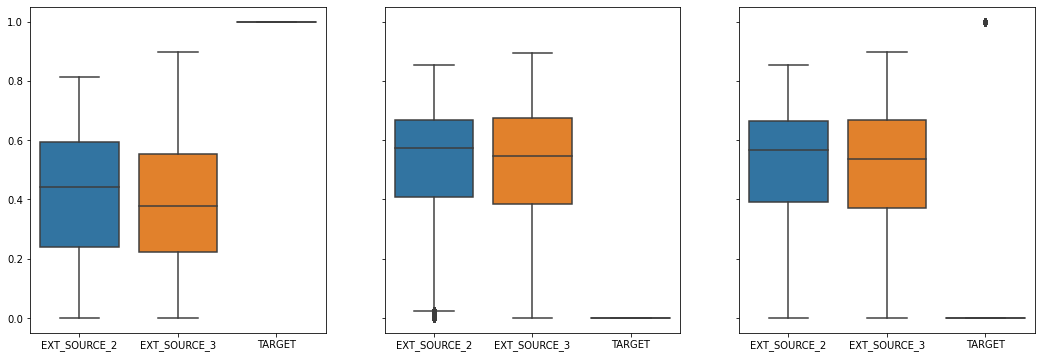

In [69]:
subset = data_application.loc[:,['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']]
fig,ax = plt.subplots(ncols=3,sharey=True)
fig.set_size_inches(18, 6, forward=True)
sns.boxplot(data=subset[subset['TARGET']==1],ax=ax[0])
sns.boxplot(data=subset[subset['TARGET']==0],ax=ax[1])
sns.boxplot(data=subset,ax=ax[2])

Since the Mean/Median are almost similar in this case we'll go with Median value for imputing null.

However theres a point to note here, 
1. Median for `TARGET` = 0 is different thant `TARGET` = 1 so, we'll have to impute the missing values separately.

*Reson for this : Since the data is imbalanced towards `TARGET` value 0, we'll have to impute the missing values seperately for both the cases to aviod introducing bias while imputing data*

*Another point to note here is `EXT_SOURCE_1` has around 56% null values, so in this case anything we impute is going to skew the data and introduce tremendous amount of bias, so we'll drop that from our analysis*

Following is the code to handle it automatically :-

In [70]:
data_application.loc[(data_application['EXT_SOURCE_2'].isnull()) & ((data_application['TARGET']==1)), 'EXT_SOURCE_2'] = data_application.loc[data_application['TARGET']==1,'EXT_SOURCE_2'].describe()['50%']
data_application.loc[(data_application['EXT_SOURCE_3'].isnull()) & ((data_application['TARGET']==1)), 'EXT_SOURCE_3'] = data_application.loc[data_application['TARGET']==1,'EXT_SOURCE_3'].describe()['50%']

In [71]:
data_application.loc[(data_application['EXT_SOURCE_2'].isnull()) & ((data_application['TARGET']==0)), 'EXT_SOURCE_2'] = data_application.loc[data_application['TARGET']==0,'EXT_SOURCE_2'].describe()['50%']
data_application.loc[(data_application['EXT_SOURCE_3'].isnull()) & ((data_application['TARGET']==0)), 'EXT_SOURCE_3'] = data_application.loc[data_application['TARGET']==0,'EXT_SOURCE_3'].describe()['50%']

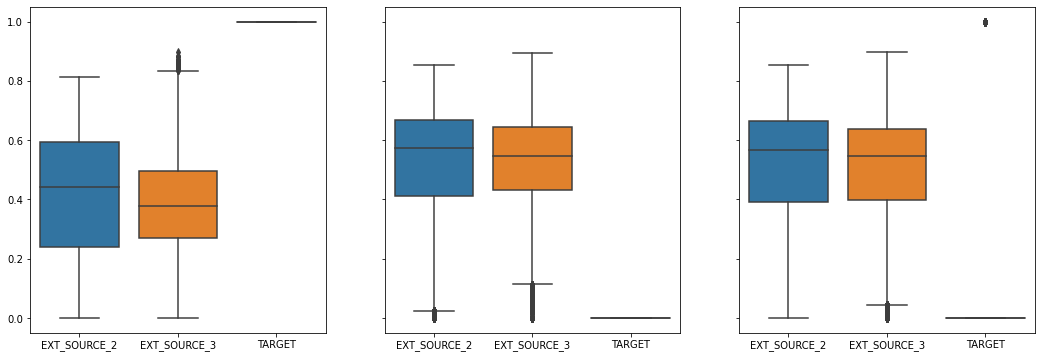

In [72]:
subset = data_application.loc[:,['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']]
fig,ax = plt.subplots(ncols=3,sharey=True)
fig.set_size_inches(18, 6, forward=True)
sns.boxplot(data=subset[subset['TARGET']==1],ax=ax[0])
sns.boxplot(data=subset[subset['TARGET']==0],ax=ax[1])
sns.boxplot(data=subset,ax=ax[2])

Point of observation : After imputation we can see that the IQR hasn't changed much however it has introduced some outliers which werent actual outlier on the raw data

In [73]:
cols_to_drop.append('EXT_SOURCE_1')

By now we have gotten rid of all the null values by imputing, and we ready with list of columns we want to drop in the next stage, below is the summary of the steps perfromed above :-

In [74]:
print(f"Total Columns to drop from imported dataset {len(cols_to_drop)}")
print(f"Total Columns imputed : {len(cols_to_impute)}")
print(f"Total rows dropped    : {rows_dropped}")

Total Columns to drop from imported dataset 68
Total Columns imputed : 28
Total rows dropped    : 13


**Removing unnecessary columns** 

In [75]:
application = data_application.drop(cols_to_drop,axis=1)

## SAMPLING THE DATA TO REMOVE THE IMBALANCE

##### Sampling data to remove data imbalance, we'll try to bring down the number of rows from TARGET=0  by randomly removing data

After resampling we'll check the key features with before and after values to see if by mistake have we introduced any unknown bias. Since we'll use random sampling technique, the chances of that happening should be low

**Reason to do Sampling before outlier analysis and feature Engineering :**

We always want our sample data to be a represenatation of actual population, hence going ahead with removing the imbalance by under sampling `TARGET` = 0 records instead of afterwards.

Idea is that the sample will remain the same and contain similar properties from population

In [76]:
count_0,count_1 = application['TARGET'].value_counts()

In [77]:
application_target_0 = application.loc[application['TARGET']==0,:]
application_target_1 = application.loc[application['TARGET']==1,:]

In [78]:
under_sampled_app_target_0 = application_target_0.sample(count_1)

Performing some basic sanity checks before merging :

In [79]:
print(application_target_0['NAME_CONTRACT_TYPE'].value_counts(normalize=True))
print(under_sampled_app_target_0['NAME_CONTRACT_TYPE'].value_counts(normalize=True))

Cash loans        0.90
Revolving loans   0.10
Name: NAME_CONTRACT_TYPE, dtype: float64
Cash loans        0.90
Revolving loans   0.10
Name: NAME_CONTRACT_TYPE, dtype: float64


In [80]:
print(application_target_0['CODE_GENDER'].value_counts(normalize=True))
print(under_sampled_app_target_0['CODE_GENDER'].value_counts(normalize=True))

F     0.67
M     0.33
XNA   0.00
Name: CODE_GENDER, dtype: float64
F     0.66
M     0.34
XNA   0.00
Name: CODE_GENDER, dtype: float64


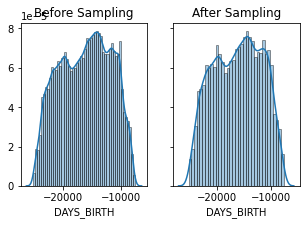

In [81]:
fig,ax = plt.subplots(ncols=2,sharey=True)
fig.set_size_inches(5, 3, forward=True)
ax[0].set_title('Before Sampling')
ax[1].set_title('After Sampling')
sns.distplot(application_target_0['DAYS_BIRTH'],ax=ax[0],label='Before Sampling',hist_kws={'edgecolor':'black'})
sns.distplot(under_sampled_app_target_0['DAYS_BIRTH'],ax=ax[1],label='After Sampling',hist_kws={'edgecolor':'black'})
plt.show()

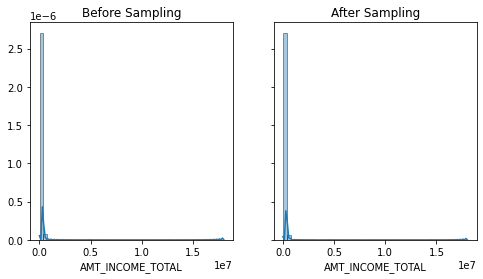

In [82]:
fig,ax = plt.subplots(ncols=2,sharey=True)
fig.set_size_inches(8, 4, forward=True)
ax[0].set_title('Before Sampling')
ax[1].set_title('After Sampling')
sns.distplot(application_target_0['AMT_INCOME_TOTAL'],ax=ax[0],label='Before Sampling',hist_kws={'edgecolor':'black'})
sns.distplot(under_sampled_app_target_0['AMT_INCOME_TOTAL'],ax=ax[1],label='After Sampling',hist_kws={'edgecolor':'black'})

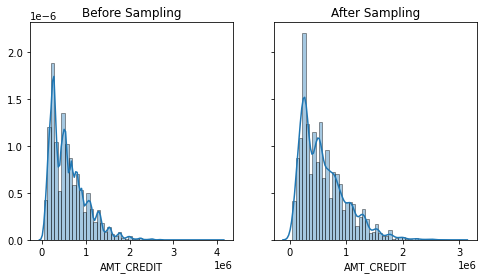

In [83]:
fig,ax = plt.subplots(ncols=2,sharey=True)
fig.set_size_inches(8, 4, forward=True)
ax[0].set_title('Before Sampling')
ax[1].set_title('After Sampling')
sns.distplot(application_target_0['AMT_CREDIT'],ax=ax[0],label='Before Sampling',hist_kws={'edgecolor':'black'})
sns.distplot(under_sampled_app_target_0['AMT_CREDIT'],ax=ax[1],label='After Sampling',hist_kws={'edgecolor':'black'})

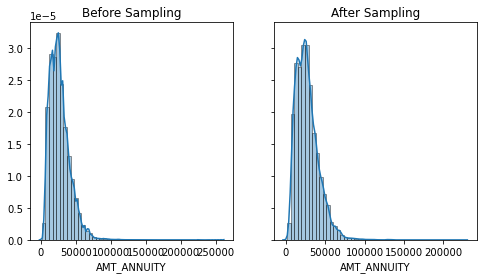

In [84]:
fig,ax = plt.subplots(ncols=2,sharey=True)
fig.set_size_inches(8, 4, forward=True)
ax[0].set_title('Before Sampling')
ax[1].set_title('After Sampling')
sns.distplot(application_target_0['AMT_ANNUITY'],ax=ax[0],label='Before Sampling',hist_kws={'edgecolor':'black'})
sns.distplot(under_sampled_app_target_0['AMT_ANNUITY'],ax=ax[1],label='After Sampling',hist_kws={'edgecolor':'black'})

In [85]:
print(f"Before sampling :\n{application_target_0['NAME_TYPE_SUITE'].value_counts(normalize=True)}")
print(f"After sampling :\n{under_sampled_app_target_0['NAME_TYPE_SUITE'].value_counts(normalize=True)}")

Before sampling :
Unaccompanied     0.81
Family            0.13
Spouse, partner   0.04
Children          0.01
Other_B           0.01
Other_A           0.00
Group of people   0.00
Name: NAME_TYPE_SUITE, dtype: float64
After sampling :
Unaccompanied     0.81
Family            0.13
Spouse, partner   0.04
Children          0.01
Other_B           0.00
Other_A           0.00
Group of people   0.00
Name: NAME_TYPE_SUITE, dtype: float64


*From above few examples its safe to conclude that the sampling has not introduced any Bias, and its randomly selected sample*

*Fruther more in some cases we could see that through sampling we were actually able to see patterns more easily*

In [86]:
application_sampled = pd.concat([under_sampled_app_target_0,application_target_1])

From this point we will be using sampled data for continuing with the analysis `application_sampled`

In [87]:
application_sampled.TARGET.value_counts(normalize=True)

1   0.50
0   0.50
Name: TARGET, dtype: float64

Checking for all the columns and match their type

In [88]:
application_sampled.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49650 entries, 212963 to 307509
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   49650 non-null  int64  
 1   TARGET                       49650 non-null  int64  
 2   NAME_CONTRACT_TYPE           49650 non-null  object 
 3   CODE_GENDER                  49650 non-null  object 
 4   FLAG_OWN_CAR                 49650 non-null  object 
 5   FLAG_OWN_REALTY              49650 non-null  object 
 6   CNT_CHILDREN                 49650 non-null  int64  
 7   AMT_INCOME_TOTAL             49650 non-null  float64
 8   AMT_CREDIT                   49650 non-null  float64
 9   AMT_ANNUITY                  49650 non-null  float64
 10  AMT_GOODS_PRICE              49650 non-null  float64
 11  NAME_TYPE_SUITE              49650 non-null  object 
 12  NAME_INCOME_TYPE             49650 non-null  object 
 13  NAME_EDUCA

# DATA CLEANING AND FEATURE ENGINEERING

1. Outlier Analysis
2. Removing the data imbalance using sampling techniques provided by pandas, and choose the most fit
3. Converting columns to their proper data type. 
4. Rounding off the data.
5. Converting Numerical to categorical when required (This will be done along with univariate analysis)

### Removing outliers :

In [89]:
# application_sampled['INCOME_GROUP'] = 
application_sampled.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00,49650.00
mean,278689.06,0.50,0.44,167257.03,579174.90,26801.96,514455.32,0.02,-15530.23,53985.39,-4765.72,-2878.53,4.15,1.00,0.85,0.22,1.00,0.26,0.06,2.16,2.10,2.08,11.95,0.02,0.05,0.04,0.10,0.26,0.20,0.47,0.46,1.45,0.16,1.43,0.12,-890.59,0.01,0.01,0.03,0.21,0.23,1.65
std,102531.31,0.50,0.73,538768.93,376951.72,13531.49,343323.70,0.01,4334.85,132156.51,3438.59,1513.82,9.24,0.00,0.36,0.41,0.04,0.44,0.23,0.93,0.51,0.50,3.27,0.13,0.23,0.20,0.30,0.44,0.40,0.21,0.19,2.34,0.48,2.32,0.39,795.58,0.08,0.10,0.19,0.78,0.59,1.88
min,100002.00,0.00,0.00,25650.00,45000.00,1993.50,45000.00,0.00,-25168.00,-17170.00,-22928.00,-6274.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-4121.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,190482.00,0.00,0.00,112500.00,276277.50,16875.00,238500.00,0.01,-19065.75,-2465.00,-7128.75,-4219.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,2.00,2.00,2.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.34,0.00,0.00,0.00,0.00,-1478.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,278537.50,0.50,0.00,144000.00,508495.50,25101.00,450000.00,0.02,-15083.00,-1120.00,-4302.00,-3052.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,2.00,2.00,2.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.52,0.46,0.00,0.00,0.00,0.00,-677.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,367523.50,1.00,1.00,202500.00,781920.00,33907.50,675000.00,0.03,-11868.00,-336.00,-1857.00,-1573.00,5.00,1.00,1.00,0.00,1.00,1.00,0.00,3.00,2.00,2.00,14.00,0.00,0.00,0.00,0.00,1.00,0.00,0.64,0.59,2.00,0.00,2.00,0.00,-238.00,0.00,0.00,0.00,0.00,0.00,3.00
max,456254.00,1.00,11.00,117000000.00,4027680.00,225000.00,3600000.00,0.07,-7678.00,365243.00,0.00,0.00,91.00,1.00,1.00,1.00,1.00,1.00,1.00,13.00,3.00,3.00,23.00,1.00,1.00,1.00,1.00,1.00,1.00,0.85,0.90,30.00,6.00,29.00,6.00,0.00,2.00,4.00,6.00,18.00,19.00,22.00


###### Few important columns on first look show they have outliers which needs treatment :
1. `AMT_INCOME_TOTAL` 
2. `AMT_CREDIT`
3. `AMT_ANNUITY`
4. `AMT_GOODS_PRICE`
5. `DAYS_EMPLOYED`

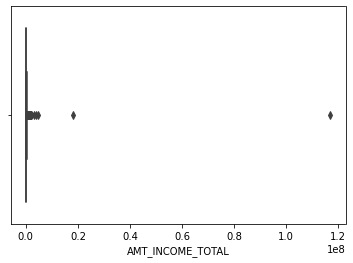

In [90]:
sns.boxplot(application_sampled['AMT_INCOME_TOTAL'])
plt.show()

Data has couple of big outlier, we need to handle it

In [91]:
outlier = application_sampled['AMT_INCOME_TOTAL'].quantile(0.999)
print(outlier)

900000.0


In [92]:
application_sampled = application_sampled.loc[application_sampled['AMT_INCOME_TOTAL'] < outlier]

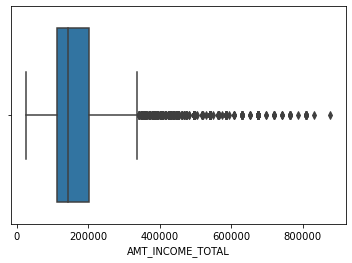

In [93]:
sns.boxplot(application_sampled['AMT_INCOME_TOTAL'])
plt.show()

There are still few more outliers, and seem to be linear, we'll treat them by binning the data into different income brackets, during feature engineering phase

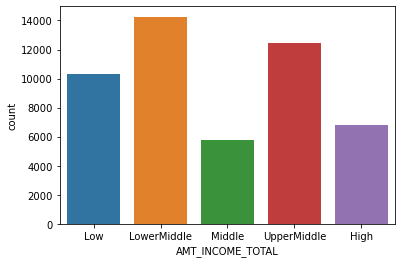

In [94]:
bin_labels = ['Low', 'LowerMiddle', 'Middle', 'UpperMiddle', 'High']
sns.countplot(pd.qcut(application_sampled['AMT_INCOME_TOTAL'],q=[0, .2, .4, .6, .8, 1],labels=bin_labels))
plt.show()

Checking for amount credit

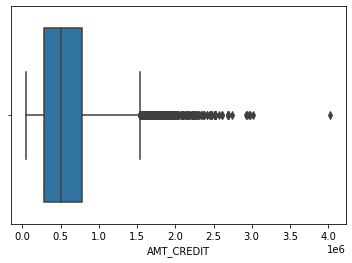

In [95]:
sns.boxplot(application_sampled['AMT_CREDIT'])

There seems to be breaks in that data and some values very exterme of IQR, we'll need to remove these values

In [96]:
outlier = application_sampled['AMT_CREDIT'].quantile(0.999)
application_sampled.loc[application_sampled['AMT_CREDIT']>outlier].shape[0]*100/application_sampled.shape[0]

0.10081661457808247

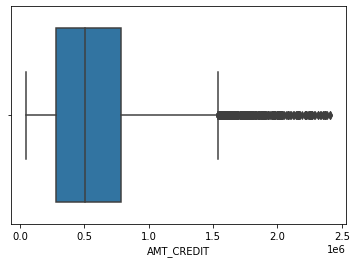

In [97]:
sns.boxplot(application_sampled.loc[application_sampled['AMT_CREDIT']<outlier]['AMT_CREDIT'])
plt.show()

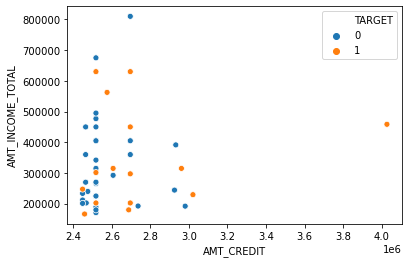

In [98]:
sns.scatterplot(data=application_sampled.loc[(application_sampled['AMT_CREDIT']>outlier)],x='AMT_CREDIT',y='AMT_INCOME_TOTAL',hue='TARGET')
plt.show()

Since its just 0.04% records also the credits are not showing any visual relation with INCOME, we can safely drop these columns

In [99]:
application_sampled = application_sampled.loc[application['AMT_CREDIT']<outlier]

Since `AMT_CREDIT` AND `AMT_ANNUITY` columns have a high correlation we'd follow same exercise

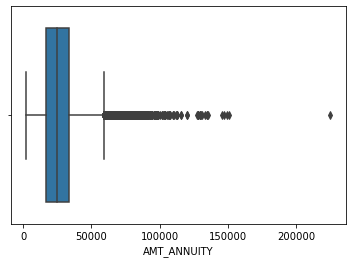

In [100]:
sns.boxplot(application_sampled['AMT_ANNUITY'])

In [101]:
outlier = application_sampled['AMT_ANNUITY'].quantile(0.9995)
print(application_sampled.loc[application_sampled['AMT_ANNUITY']>outlier].shape[0]*100/application_sampled.shape[0])
application_sampled = application_sampled.loc[application_sampled['AMT_ANNUITY']<outlier]

0.05045917852457362


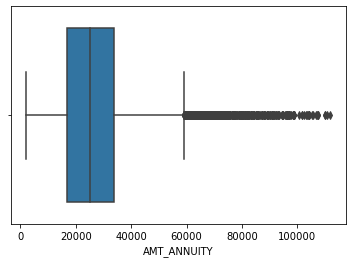

In [102]:
sns.boxplot(application_sampled.loc[application_sampled['AMT_ANNUITY']<outlier]['AMT_ANNUITY'])

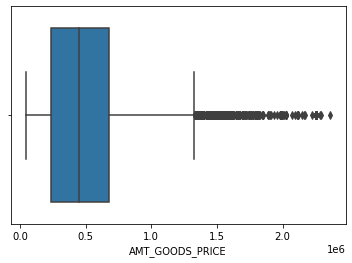

In [103]:
sns.boxplot(application_sampled['AMT_GOODS_PRICE'])

We wouldn't need to perform outlier treatment to this data, as there are outliers but those are linear, we might need to convert this to categorical variable if required

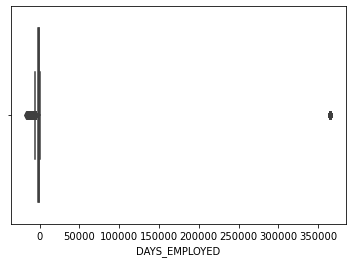

In [104]:
sns.boxplot(application_sampled['DAYS_EMPLOYED'])

The outlier needs to be indentified and removed, 

Reason : since this is a rel field and all the data is supposed to be less than 0 a value as high as this could have implication

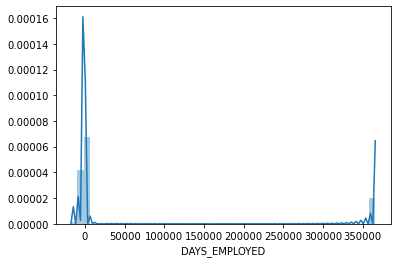

In [105]:
sns.distplot(application_sampled['DAYS_EMPLOYED'])

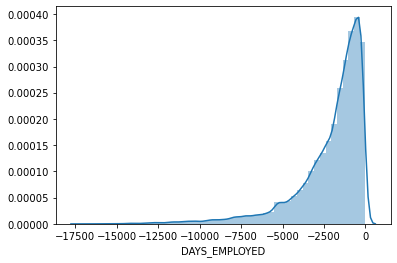

In [106]:
sns.distplot(application_sampled.loc[application['DAYS_EMPLOYED'] < 0]['DAYS_EMPLOYED'])

In [107]:
application_sampled.loc[application_sampled['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED'].value_counts()*100/application_sampled.shape[0]

365243   15.29
Name: DAYS_EMPLOYED, dtype: float64

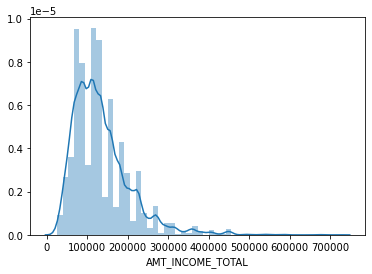

In [108]:
sns.distplot(application_sampled.loc[application_sampled['DAYS_EMPLOYED'] > 0]['AMT_INCOME_TOTAL'])

In [109]:
application_sampled[application_sampled['DAYS_EMPLOYED'] >= -1]['DAYS_EMPLOYED'].value_counts()

365243    7570
0            1
Name: DAYS_EMPLOYED, dtype: int64

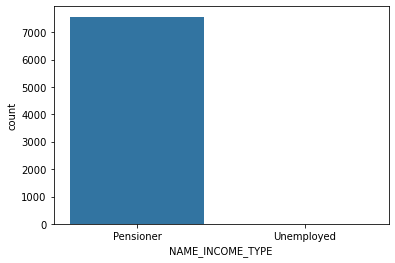

In [110]:
sns.countplot(application_sampled.loc[application_sampled['DAYS_EMPLOYED'] > 0]['NAME_INCOME_TYPE'])

Looking at the above data, its safe to assume that the `DAYS_EMPLOYED` > 0 indicates that the client is retired/unemployed

We'll need to handle the data seperately, and then merge it back to the main dataframe
1. Convert the data into year format.
2. Make all the Pensioners, Days_Employed = 0
Since these are steps unders feature engineering we'll perform it then

### Feature Engineering and Univariate Analysis

**Analysing some important columns and performing feature engineering on them if required**

**Converting some rel days columns to yearly and few from numerical to Categorical**

Observed data columns that have relative date, converting them to appropriate format

`DAYS_BIRTH` `DAYS_EMPLOYED` `DAYS_REGISTRATION` `DAYS_ID_PUBLISH`

Converting `DAYS_BIRTH` to a new column `AGE` and a categorical columns `AGE_GROUP`


In [111]:
application_sampled['DAYS_BIRTH'] = application['DAYS_BIRTH'].apply(lambda x : round(abs(x/365.25)))
application_sampled.rename(columns={'DAYS_BIRTH' : 'AGE'},inplace=True)

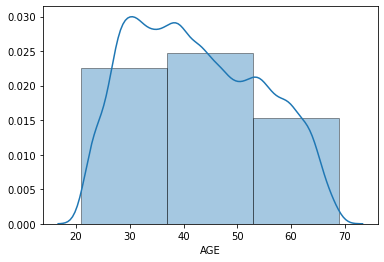

In [112]:
sns.distplot(application_sampled['AGE'],bins=3,hist_kws={'edgecolor':'black'})

In [113]:
application_sampled['AGE_GROUP'] = pd.cut(application_sampled['AGE'],bins=[20,37,54,100],labels=['Young','Adult','Senior'])

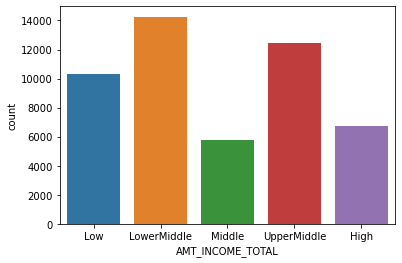

In [114]:
income_bracket=['Low', 'LowerMiddle', 'Middle', 'UpperMiddle', 'High']
sns.countplot(pd.qcut(application_sampled['AMT_INCOME_TOTAL'],q=[0, .2, .4, .6, .8, 1],labels=income_bracket))

In [115]:
application_sampled['INCOME_BRACKET'] = pd.qcut(application_sampled['AMT_INCOME_TOTAL'],q=[0, .2, .4, .6, .8, 1],labels=income_bracket)

Changing `DAYS_EMPLOYED` as `YEARS_EMPLOYED` as it will bring little more homogeneity

In [116]:
application_sampled['YEARS_EMPLOYED'] = 0
application_sampled.loc[(application_sampled['DAYS_EMPLOYED'] < 0) & (application_sampled['DAYS_EMPLOYED'] >= -365),'YEARS_EMPLOYED'] = 0.5
application_sampled.loc[application_sampled['DAYS_EMPLOYED'] < -365,'YEARS_EMPLOYED'] = round(abs(application_sampled.loc[application_sampled['DAYS_EMPLOYED'] < -365,'DAYS_EMPLOYED']/365),0)

Creating a new column from `YEARS_EMPLOYED` that'll be categorical `YEARS_EMPLOYED_CAT`

In [117]:
application_sampled['YEARS_EMPLOYED_CAT']=pd.cut(application_sampled['YEARS_EMPLOYED'],bins=[0,0.5,5,10,20,30,47],labels=['NotEmployed','0-5','5-10','10-20','20-30','30+'])

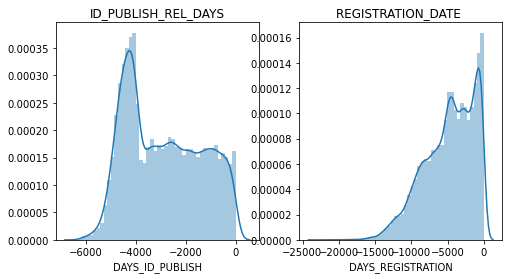

In [118]:
fig,ax = plt.subplots(ncols=2,sharey=False)
fig.set_size_inches(8, 4, forward=True)
ax[0].set_title('ID_PUBLISH_REL_DAYS')
ax[1].set_title('REGISTRATION_DATE ')
sns.distplot(application_sampled['DAYS_ID_PUBLISH'],ax=ax[0])
sns.distplot(application_sampled['DAYS_REGISTRATION'],ax=ax[1])

We create new categorical columns from these to reinforce the inference drawn from these

In [119]:
days_label = ['Old','Medium','Recent','New']
application_sampled['ID_AGE'] = pd.qcut(application_sampled['DAYS_ID_PUBLISH'],q=[0,.35,.7,.9,1],labels=days_label)
application_sampled['REGISTRATION_AGE'] = pd.qcut(application_sampled['DAYS_REGISTRATION'],q=[0,.35,.7,.9,1],labels=days_label)

## Data Cleaning and preparation for previous_application_data

1. Drop columns with null values with null > 30%
2. Check if there are outliers and outlier limits

In [120]:
data_previous = pd.read_csv('previous_application.csv')

In [121]:
data_previous.shape

(1670214, 37)

We'll remove all the columns which more than ~50% null

In [123]:
s = data_previous.isnull().sum()*100/data_previous.shape[0]
cols_to_drop = list(s[s>49].index)

In [124]:
cols_to_drop

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE']

In [126]:
data_previous.drop(columns=cols_to_drop,axis=1,inplace=True)

In [127]:
data_previous['NFLAG_INSURED_ON_APPROVAL'].value_counts()/data_previous.shape[0]

0.00   0.40
1.00   0.20
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64

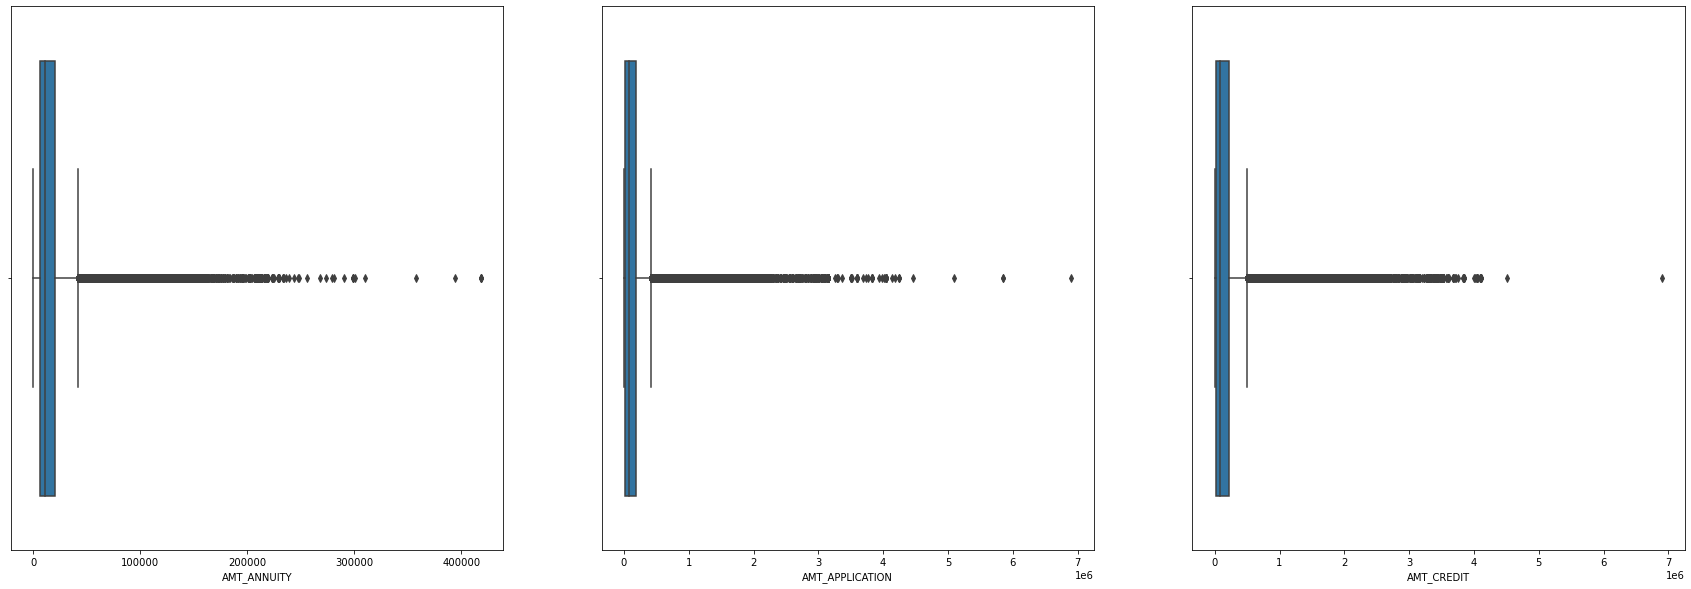

In [128]:
fig,ax = plt.subplots(ncols=3,sharey=True)
fig.set_size_inches(30, 10, forward=True)

sns.boxplot(data_previous['AMT_ANNUITY'],ax=ax[0])
sns.boxplot(data_previous['AMT_APPLICATION'],ax=ax[1])
sns.boxplot(data_previous['AMT_CREDIT'],ax=ax[2])


Removing the outliers from above three columns

In [129]:
data_previous = data_previous.loc[data_previous['AMT_CREDIT']<data_previous['AMT_CREDIT'].quantile(.99)]
data_previous = data_previous.loc[data_previous['AMT_APPLICATION']<data_previous['AMT_APPLICATION'].quantile(.99)]
data_previous = data_previous.loc[data_previous['AMT_ANNUITY']<data_previous['AMT_ANNUITY'].quantile(.99)]

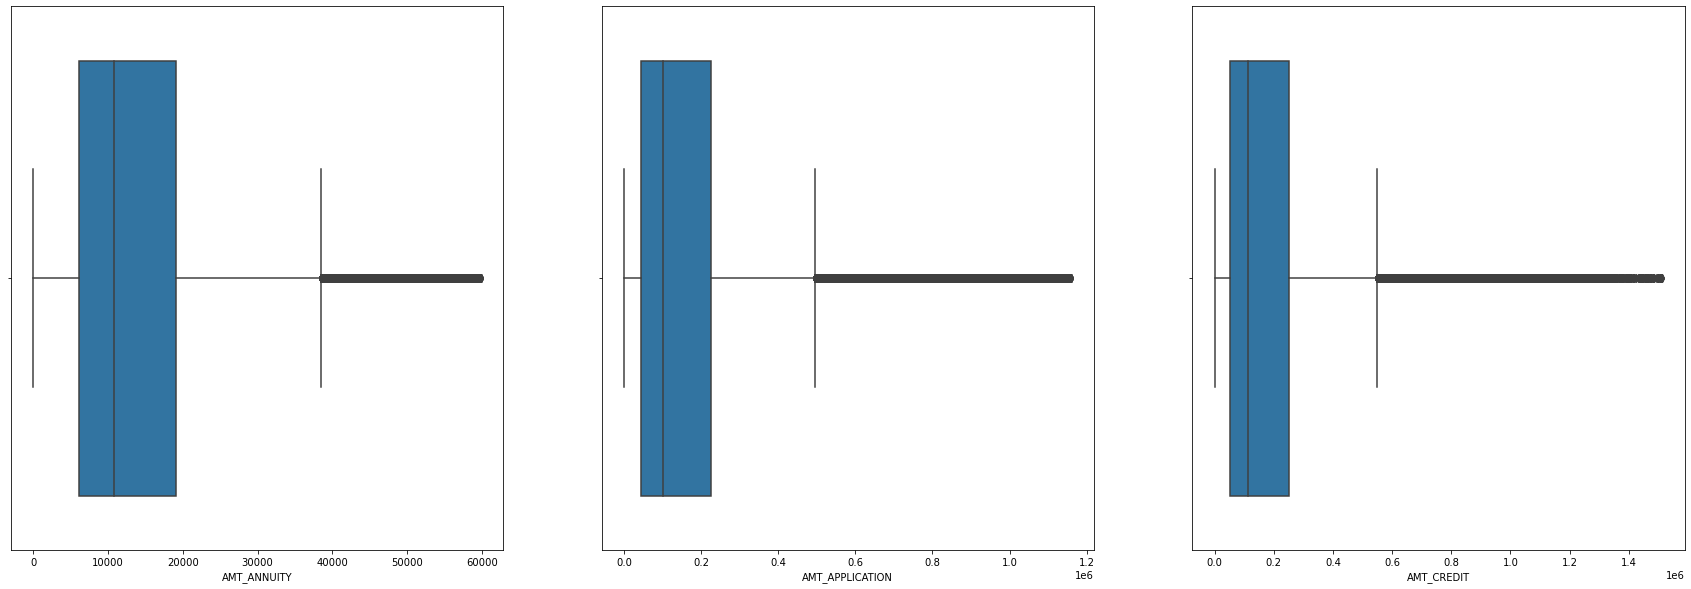

In [130]:
fig,ax = plt.subplots(ncols=3,sharey=True)
fig.set_size_inches(30, 10, forward=True)

sns.boxplot(data_previous['AMT_ANNUITY'],ax=ax[0])
sns.boxplot(data_previous['AMT_APPLICATION'],ax=ax[1])
sns.boxplot(data_previous['AMT_CREDIT'],ax=ax[2])

In [131]:
complete_dataset = pd.merge(application_sampled,data_previous,on='SK_ID_CURR')

In [132]:
complete_dataset

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,INCOME_BRACKET,YEARS_EMPLOYED,YEARS_EMPLOYED_CAT,ID_AGE,REGISTRATION_AGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,346782,0,Cash loans,F,Y,N,0,121500.00,83538.00,6826.50,67500.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,28,-1695,-3792.00,-1626,8.00,1,1,0,1,0,1,Undefined,1.00,2,2,MONDAY,8,0,0,0,0,0,0,Business Entity Type 2,0.52,0.50,0.00,0.00,0.00,0.00,-465.00,0.00,0.00,0.00,1.00,0.00,5.00,Young,LowerMiddle,5.00,0-5,Recent,Medium,1466438,Consumer loans,6552.54,81156.96,64921.50,81156.96,WEDNESDAY,13,Y,1,XAP,Approved,-376,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,45,Connectivity,12.00,middle,POS mobile with interest,365243.00,-340.00,-10.00,-10.00,-8.00,0.00
1,346782,0,Cash loans,F,Y,N,0,121500.00,83538.00,6826.50,67500.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,28,-1695,-3792.00,-1626,8.00,1,1,0,1,0,1,Undefined,1.00,2,2,MONDAY,8,0,0,0,0,0,0,Business Entity Type 2,0.52,0.50,0.00,0.00,0.00,0.00,-465.00,0.00,0.00,0.00,1.00,0.00,5.00,Young,LowerMiddle,5.00,0-5,Recent,Medium,2237358,Cash loans,14139.36,67500.00,69727.50,67500.00,THURSDAY,11,Y,1,Other,Refused,-683,XNA,LIMIT,Repeater,XNA,Cash,walk-in,Contact center,-1,XNA,6.00,high,Cash Street: high,nan,nan,nan,nan,nan,nan
2,346782,0,Cash loans,F,Y,N,0,121500.00,83538.00,6826.50,67500.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,28,-1695,-3792.00,-1626,8.00,1,1,0,1,0,1,Undefined,1.00,2,2,MONDAY,8,0,0,0,0,0,0,Business Entity Type 2,0.52,0.50,0.00,0.00,0.00,0.00,-465.00,0.00,0.00,0.00,1.00,0.00,5.00,Young,LowerMiddle,5.00,0-5,Recent,Medium,1660446,Cash loans,10279.44,45000.00,50692.50,45000.00,TUESDAY,9,Y,1,Everyday expenses,Approved,-573,Cash through the bank,XAP,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.00,high,Cash Street: high,365243.00,-543.00,-393.00,-393.00,-386.00,1.00
3,346782,0,Cash loans,F,Y,N,0,121500.00,83538.00,6826.50,67500.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,28,-1695,-3792.00,-1626,8.00,1,1,0,1,0,1,Undefined,1.00,2,2,MONDAY,8,0,0,0,0,0,0,Business Entity Type 2,0.52,0.50,0.00,0.00,0.00,0.00,-465.00,0.00,0.00,0.00,1.00,0.00,5.00,Young,LowerMiddle,5.00,0-5,Recent,Medium,1761469,Cash loans,15419.61,67500.00,76041.00,67500.00,WEDNESDAY,14,Y,1,Furniture,Approved,-

# DATA ANALYSIS :

Following steps we'll be taking for the data analysis

* Check data imbalance and find imbalance percentage
* Categorize data with `TARGET` values {0,1}
* Univariate Analysis 
* Correlation between columns
* BiVariate Analysis
* MultiVariate Analysis

* Join perv to current data
* Based on the results from prev analysis, try to infer and create hypothesis

Most of our univariate analysis has been performed during the Feature engineering process, this time we'll perform same steps but with TARGET column in picture

In [ ]:
application_sampled.head()

In [ ]:
sampled_target1 = application_sampled[application_sampled['TARGET']==1]
sampled_target0 = application_sampled[application_sampled['TARGET']==0]

In [ ]:
import seaborn as sns
sns.set()
df.set_index('App').T.plot(kind='bar', stacked=True)

In [ ]:
fig,ax = plt.subplots(ncols=2,sharey=True)
fig.set_size_inches(8, 4, forward=True)
ax[0].set_title('Non Defaults')
ax[1].set_title('Defaults')
sns.scatterplot(data=sampled_target0,ax=ax[0],x='AMT_ANNUITY',y='AMT_CREDIT')
sns.scatterplot(data=sampled_target1,ax=ax[1],x='AMT_ANNUITY',y='AMT_CREDIT')
plt.show()

From the above graph we observe theres a high correlation between `AMT_ANNUITY` and `AMT_CREDIT`

In [ ]:
fig,ax = plt.subplots(ncols=2,sharey=True)
fig.set_size_inches(8, 4, forward=True)
ax[0].set_title('Non Defaults')
ax[1].set_title('Defaults')
sns.distplot(sampled_target0['AGE'],ax=ax[0])
sns.distplot(sampled_target1['AGE'],ax=ax[1])
plt.show()

In [ ]:
fig,ax = plt.subplots(ncols=2,sharey=True)
fig.set_size_inches(8, 4, forward=True)
ax[0].set_title('Non Defaults')
ax[1].set_title('Defaults')
sns.countplot(sampled_target0['AGE_GROUP'],ax=ax[0])
sns.countplot(sampled_target1['AGE_GROUP'],ax=ax[1])
plt.show()

From the above graph we see that those who have problems with the loan payments are generally more concentraded towards a younger age group, we can say around 20-40 and as the age increases the number of defaults starts to drop.

In [ ]:
fig,ax = plt.subplots(ncols=2,sharey=True)
fig.set_size_inches(8, 4, forward=True)
ax[0].set_title('Non Defaults')
ax[1].set_title('Defaults')
ax[0].tick_params(labelrotation=45)
ax[1].tick_params(labelrotation=45)
sns.countplot(sampled_target0['INCOME_BRACKET'],ax=ax[0])
sns.countplot(sampled_target1['INCOME_BRACKET'],ax=ax[1])
plt.show()

In [ ]:
fig,ax = plt.subplots(ncols=2,sharey=True)
fig.set_size_inches(16, 8, forward=True)
ax[0].set_title('Non Defaults')
ax[1].set_title('Defaults')
ax[0].tick_params(labelrotation=45)
ax[1].tick_params(labelrotation=45)
sns.barplot(data=sampled_target0,x='INCOME_BRACKET',y='AMT_CREDIT',ax=ax[0])
sns.barplot(data=sampled_target1,x='INCOME_BRACKET',y='AMT_CREDIT',ax=ax[1])
plt.show()

Looking at the legends and the data from the above plot we can see that as the income increase the `AMT_CREDIT` also increases

In [ ]:
sns.heatmap(sampled_target0.groupby('INCOME_BRACKET').mean())

In [ ]:
sns.pairplot(sampled_target0[['AGE','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_ANNUITY','YEARS_EMPLOYED','REGION_POPULATION_RELATIVE']])
plt.show()

In [ ]:
sampled_Target0.head()

In [ ]:
sns.heatmap(application_sampled.corr(),cmap="Spectral")

In [ ]:
sns.heatmap(application_sampled[['AGE','AMT_INCOME_TOTAL','YEARS_EMPLOYED','TARGET','EXT_SOURCE_3','REGION_RATING_CLIENT_W_CITY']].corr(),cmap="Spectral")

In [ ]:
fig,ax = plt.subplots(ncols=2,sharey=True)
fig.set_size_inches(8, 4, forward=True)
ax[0].set_title('Non Defaults')
ax[1].set_title('Defaults')
sns.countplot(data=sampled_target0,x='AMT_ANNUITY',y='AMT_INCOME_TOTAL',ax=ax[0])
sns.countplot(data=sampled_target1,x='AMT_ANNUITY',y='AMT_INCOME_TOTAL',ax=ax[1])

In [ ]:
fig,ax = plt.subplots(ncols=2,sharey=True)
fig.set_size_inches(8, 4, forward=True)
ax[0].set_title('Non Defaults')
ax[1].set_title('Defaults')

In [ ]:
fig,ax = plt.subplots(ncols=2,sharey=True)
fig.set_size_inches(8, 4, forward=True)
ax[0].set_title('Non Defaults')
ax[1].set_title('Defaults')

In [ ]:
fig,ax = plt.subplots(ncols=2,sharey=True)
fig.set_size_inches(8, 4, forward=True)
ax[0].set_title('Non Defaults')
ax[1].set_title('Defaults')

In [ ]:
fig,ax = plt.subplots(ncols=2,sharey=True)
fig.set_size_inches(8, 4, forward=True)
ax[0].set_title('Non Defaults')
ax[1].set_title('Defaults')

In [ ]:
fig,ax = plt.subplots(ncols=2,sharey=True)
fig.set_size_inches(8, 4, forward=True)
ax[0].set_title('Non Defaults')
ax[1].set_title('Defaults')

#  PRESENTATION AND RECOMMENDATIONS :

* Purpose
* Steps Involved
* Data Analysis performed
* Graphs from Univariate, BiVariate and Multivariate analysis
* Recommendations derived based from the analysis based on case study : Parameters that affect the loan defaulting.